# LetsGrowMore
## Data Science Internship
### 02 Intermediate Level Task: Prediction Using Decision Tree Algorithm 

In [2]:
#importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [3]:
#Loading and reading the dataset
data = pd.read_csv('./data/Iris.csv')

In [4]:
idata = data

### Exploring the dataset

In [5]:
# Display the first five rows of the dataset
idata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Display the last five rows of the dataset
idata.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
#Removing the irrelevant column and also renaming all other columns
idata = idata.drop('Id', axis = 1)
idata.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']

In [8]:
idata.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [9]:
idata.shape #Number of rows and columns 

(150, 5)

In [10]:
# Checking for null values
idata.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
# Displaying the unique values in each column
idata.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

## Data Visualization 

<AxesSubplot:xlabel='species', ylabel='count'>

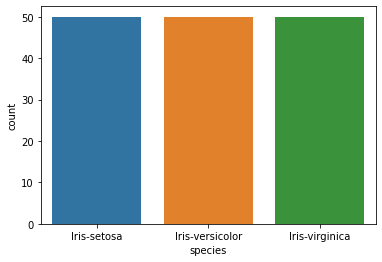

In [13]:
sns.countplot(x = idata['species'])

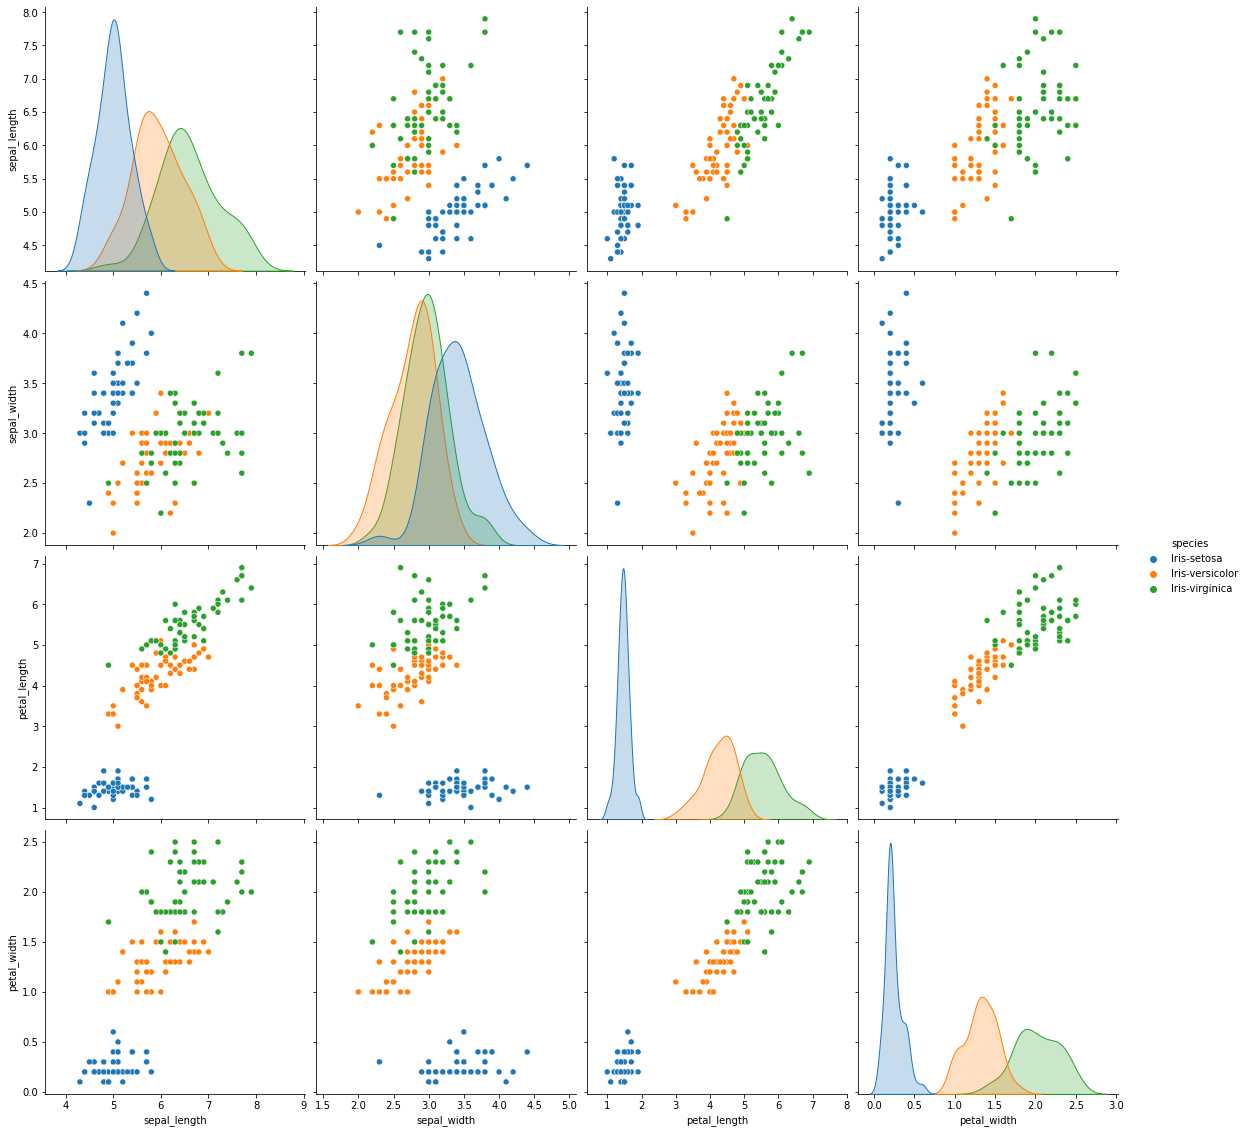

In [14]:
sns.pairplot(idata, hue = 'species', height = 4)
plt.show()

Getting insights from each column using scatterplot

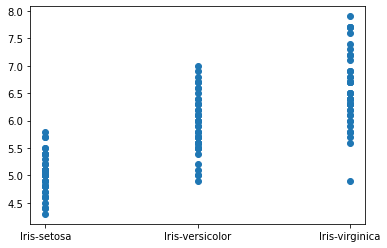

In [16]:
plt.scatter(data = idata, x = 'species', y = 'sepal_length')

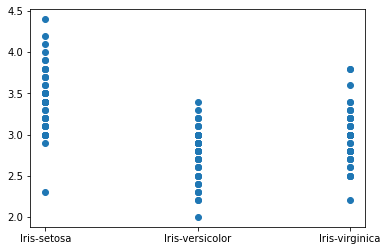

In [17]:
plt.scatter(data = idata, x = 'species', y = 'sepal_width')

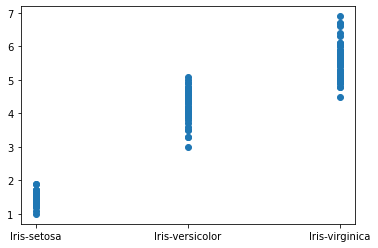

In [19]:
plt.scatter(data = idata, x = 'species', y = 'petal_length')

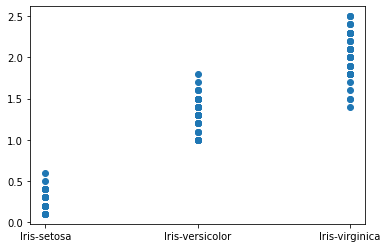

In [20]:
plt.scatter(data = idata, x = 'species', y = 'petal_width')

## Data preprocessing 

In [21]:
idata['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
mapp = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
idata['species'] = idata['species'].map(mapp) #Label encoder can alternatively be used
idata

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
idata['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [25]:
# defining the predictor columns and target column
# x is the predictor
# y is the target variable
x = idata.drop('species', axis = 1)
y = idata['species']

In [26]:
#splitting the dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## Training the model 

In [27]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

## Evaluating the model

In [28]:
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9777777777777777


In [30]:
features = data.columns[: -1]
classes = data['Species'].unique().tolist()

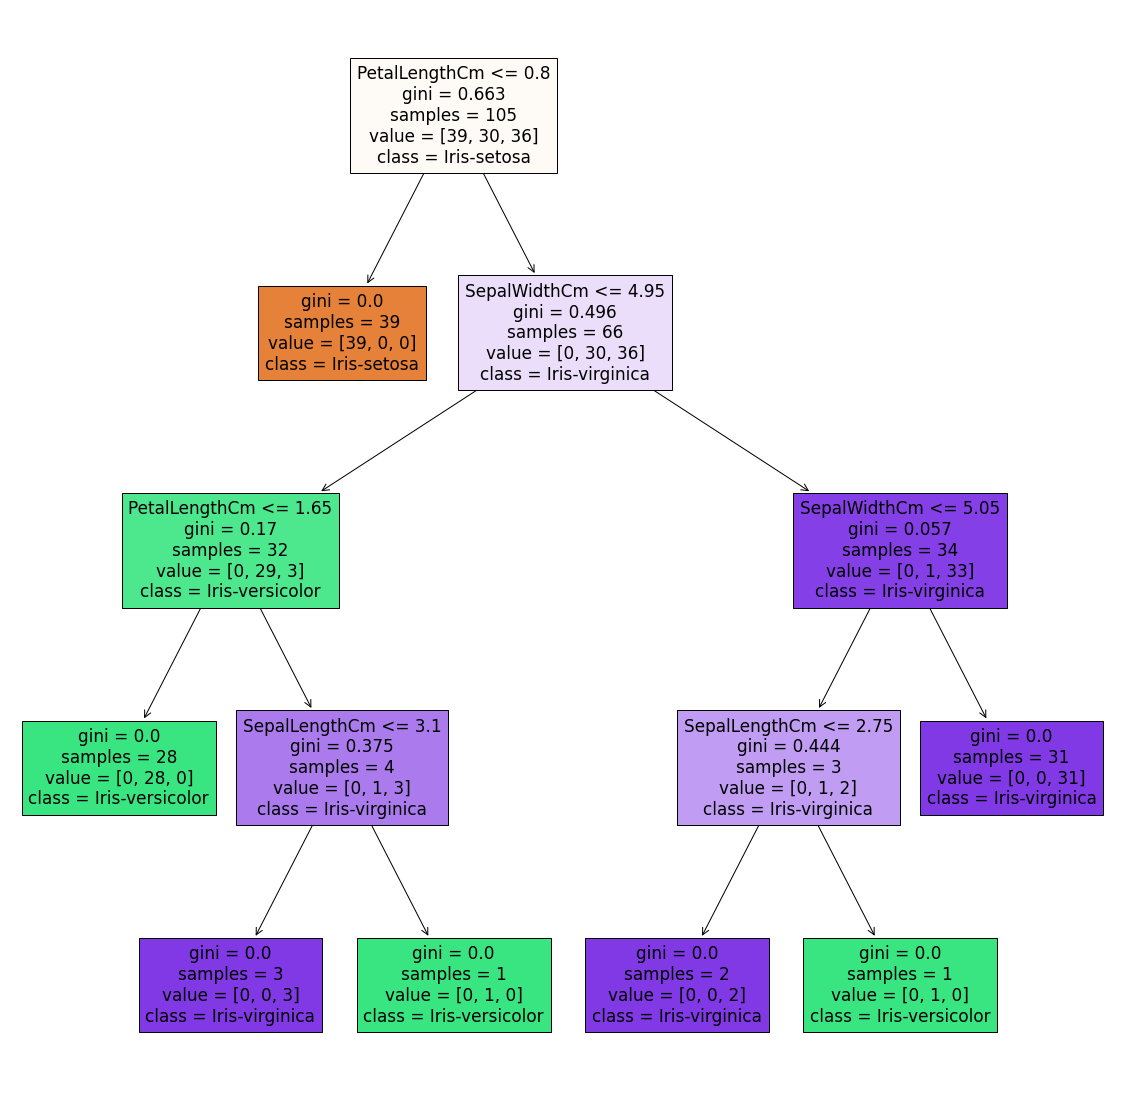

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
plot_tree(dt, feature_names = features, class_names = classes, filled = True)
plt.show()

### Sample prediction

In [35]:
sepallength = float(input("Enter the Sepal Length: "))
sepalwidth = float(input("Enter the Sepal Width: "))
petallength = float(input("Enter the Petal Length: "))
petalwidth = float(input("Enter the Petal Width:"))

Enter the Sepal Length: 1.4
Enter the Sepal Width: 3.6
Enter the Petal Length: 3
Enter the Petal Width:5.7


In [37]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
prediction = dt.predict([[sepallength, sepalwidth, petallength, petalwidth]])
if prediction == 0:
    print("The Predictied Species is {}.".format(species[0]))
elif prediction == 1:
    print("The Predictied Species is {}.".format(species[1]))
else:
    print("The Predictied Species is {}.".format(species[2]))

The Predictied Species is Iris-versicolor.
